# Home work -1 

###  Team No: 15

### Name                    Student ID
#### Tulasi Nakka            1001928971
####  Sriram Venkatest    1002031910                                                                                                                                                                        ####  Prem Chand Vemuri 1002019189
####  Vinil Reddy Surakunta  1002072982


# k- Neighbours Classifier for USPS Dataset

#### USPS is an Handwritten Digits dataset.

#### The dataset has 7291 train and 2007 test images. The images are 16*16 grayscale pixels.

#### The dataset is given in hdf5 file format, the hdf5 file has two groups train and test and each group has two datasets: data and target.

In [391]:
#import libraries
%pylab inline
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
current_path = os.getcwd()
print(current_path)

Populating the interactive namespace from numpy and matplotlib
C:\Users\tulas\Untitled Folder


C:\Users\tulas\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Loading the USPS Dataset

In [392]:
import h5py                                          
with h5py.File("usps.h5",'r') as hf:
        train = hf.get('train')
        X_tr = train.get('data')[:]
        y_tr = train.get('target')[:]
        test = hf.get('test')
        X_te = test.get('data')[:]
        y_te = test.get('target')[:]

In [393]:
from functools import reduce
path="usps.h5"
def hdf5(path, data_key = "data", target_key = "target", flatten = True):
    """
        loads data from hdf5: 
        - hdf5 should have 'train' and 'test' groups 
        - each group should have 'data' and 'target' dataset or spcify the key
        - flatten means to flatten images N * (C * H * W) as N * D array
    """
    with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        X_tr = train.get(data_key)[:]
        y_tr = train.get(target_key)[:]
        test = hf.get('test')
        X_te = test.get(data_key)[:]
        y_te = test.get(target_key)[:]
        if flatten:
            X_tr = X_tr.reshape(X_tr.shape[0], reduce(lambda a, b: a * b, X_tr.shape[1:]))
            X_te = X_te.reshape(X_te.shape[0], reduce(lambda a, b: a * b, X_te.shape[1:]))
    return X_tr, y_tr, X_te, y_te

In [394]:
X_tr, y_tr, X_te, y_te = hdf5(path)    #Total images for training and testing the classifier
X_tr.shape, y_tr,X_te.shape,y_te

((7291, 256),
 array([6, 5, 4, ..., 3, 0, 1]),
 (2007, 256),
 array([9, 6, 3, ..., 4, 0, 1]))

# Plotting the USPS sample image 
#### In the below shown figure we have taken the sample size as '10' and shown the image with 10 x 10 formaat.

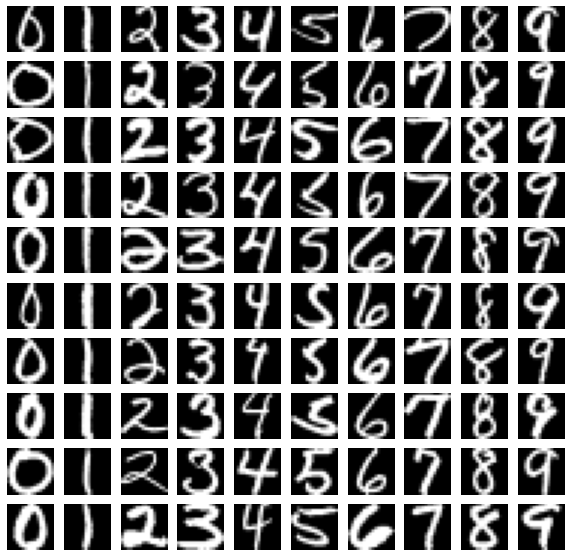

In [395]:
num_samples = 10          # No. of rows and colums of data to be displayed
num_classes = len(set(y_tr))

classes = set(y_tr)
num_classes = len(classes)
fig, ax = plt.subplots(num_samples, num_classes, sharex = True, sharey = True, figsize=(num_classes, num_samples))

for label in range(num_classes):
    class_idxs = np.where(y_tr == label)
    for i, idx in enumerate(np.random.randint(0, class_idxs[0].shape[0], num_samples)):
        ax[i, label].imshow(X_tr[class_idxs[0][idx]].reshape([16, 16]), 'gray')
        ax[i, label].set_axis_off()

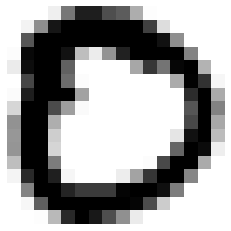

In [396]:
plt.imshow(X_tr[80].reshape(16,16), cmap='binary')   # sample image at a particular array value
plt.axis('off')
plt.show()

# Splitting the data for training and testing

In [397]:
from sklearn.model_selection import train_test_split # import the package for train/test
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr,  test_size=0.25, random_state=42)

# KNN Classifier for k=5 neighbors

#### Training

In [398]:
# Import KNN classifier to derive the model
from sklearn.neighbors import KNeighborsClassifier
knn_clf= KNeighborsClassifier( 
                     algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

knn_clf.fit(X=X_train, y=y_train)


KNeighborsClassifier(weights='distance')

#### Testing

In [399]:
preds = knn_clf.predict(X_test)
preds
accuracy = sum((preds == y_test))/len(y_test)
print("Accuracy of KNN with  5 neighbors= ", accuracy)

Accuracy of KNN with  5 neighbors=  0.9654415798134942


In [400]:
# printing the results
from sklearn import metrics
print('Precision, Recall, Confusion matrix\n')

print(metrics.classification_report(y_test, preds, digits=3))

Precision, Recall, Confusion matrix

              precision    recall  f1-score   support

           0      0.966     0.987     0.976       314
           1      0.981     1.000     0.990       255
           2      0.976     0.953     0.964       171
           3      0.928     0.947     0.937       150
           4      0.974     0.955     0.965       157
           5      0.964     0.944     0.954       143
           6      0.987     0.980     0.983       152
           7      0.967     0.946     0.957       186
           8      0.984     0.911     0.946       135
           9      0.924     0.981     0.952       160

    accuracy                          0.965      1823
   macro avg      0.965     0.961     0.962      1823
weighted avg      0.966     0.965     0.965      1823



# 1.  Measuring Accuracy using Cross validation
#### considering cv=5, for training and test on 5 subsets of data.

In [401]:
for train_index, test_index in skfolds.split(X=X_train, y=y_train):
    clone_clf = clone(knn_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    num_correct = sum(y_pred == y_test_folds)
    print(num_correct / len(y_pred))

0.9625228519195612
0.9561243144424132
0.9616087751371115
0.9606587374199451
0.958828911253431


In [402]:
from sklearn.model_selection import cross_val_score

In [403]:
scores = cross_val_score(estimator=clone(knn_clf), X=X_train, y=y_train, cv=5, scoring="accuracy", n_jobs=4)
scores

array([0.96252285, 0.95612431, 0.96160878, 0.96065874, 0.95882891])

# 2. Confusion Matrix

In [404]:
from sklearn.model_selection import cross_val_predict

In [405]:
y_train_pred = cross_val_predict(estimator=knn_clf, X=X_train, y=y_train, cv=5, n_jobs=4)

In [406]:
y_train_pred.shape

(5468,)

In [407]:
from sklearn.metrics import confusion_matrix

In [408]:
confusion_matrix(y_true=y_train, y_pred=y_train_pred)

array([[875,   0,   2,   0,   0,   1,   2,   0,   0,   0],
       [  0, 750,   0,   0,   0,   0,   0,   0,   0,   0],
       [  9,   3, 528,   1,   3,   0,   0,  10,   5,   1],
       [  3,   1,   1, 490,   0,   8,   0,   0,   5,   0],
       [  1,  13,   3,   0, 447,   0,   6,   0,   0,  25],
       [  7,   0,   3,   9,   1, 383,   7,   0,   1,   2],
       [ 11,   2,   0,   0,   1,   1, 496,   0,   1,   0],
       [  0,   3,   0,   0,   3,   0,   0, 446,   0,   7],
       [  3,   5,   1,  13,   2,   3,   3,   4, 372,   1],
       [  2,   1,   0,   0,   8,   0,   0,  10,   1, 462]], dtype=int64)

In [409]:
y_train_perfect_predictions = y_train.copy()

In [410]:
confusion_matrix(y_true=y_train, y_pred=y_train_perfect_predictions)

array([[880,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 750,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 560,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 508,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 495,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 413,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 512,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 459,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 407,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 484]], dtype=int64)

# 3. Precision and Recall

In [411]:
from sklearn.metrics import precision_score, recall_score

In [412]:
precision_score(y_true=y_train, y_pred=y_train_pred,average='macro')

0.9597394964238788

In [413]:
recall_score(y_true=y_train, y_pred=y_train_pred
                                           ,average='macro')

0.9541111260121111

# 4. Changing K values

#### For all the below k values we got our accuracy to be >90% 

Accuracy of KNN with k= 6 is 0.9665386725178278
Accuracy of KNN with k= 7 is 0.9605046626439934
Accuracy of KNN with k= 8 is 0.9632473944048272
Accuracy of KNN with k= 9 is 0.9583104772353264
Accuracy of KNN with k= 10 is 0.9583104772353264
Accuracy of KNN with k= 11 is 0.9544706527701591
Accuracy of KNN with k= 12 is 0.9528250137136588
Accuracy of KNN with k= 13 is 0.9489851892484915
Accuracy of KNN with k= 14 is 0.9495337356006582


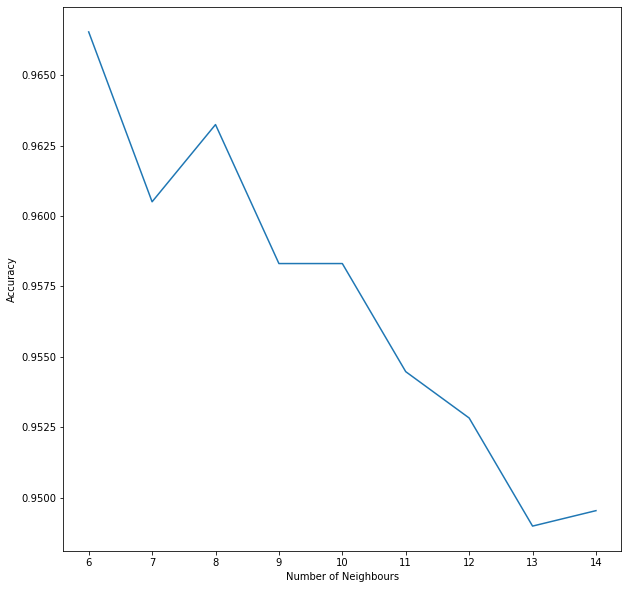

In [414]:
import matplotlib.pyplot as plt
n=[]
acc=[]
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr,  test_size=0.25, random_state=42)
for i in range(1,10):
    #knn_clf = KNeighborsClassifier(n_jobs=-1,n_neighbors=i+5)
    knn_clf= KNeighborsClassifier( 
                     algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=i+5, p=2,
                     weights='distance')
    knn_clf.fit(X=X_train, y=y_train)
    preds = knn_clf.predict(X_test)
    preds
    accuracy = sum((preds == y_test))/len(y_test)
    print("Accuracy of KNN with k=",i+5,'is',accuracy)
    n.append(i+5)
    acc.append(accuracy)
plt.figure(figsize = (10, 10))
plt.plot(n,acc)
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.show()
df = pd.DataFrame()
df['N_Neighbours'] = n
df['Accuracies']  = acc